In [5]:
!pip install pandas seaborn matplotlib 
!pip install scikit-learn

  Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------------------- ------------------- 81.9/165.9 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pandas-2.2.2-cp311-cp311-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 6.0 MB/s eta 0:00:


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [9]:
file_path = 'core/main/restaurants_small.csv'
df = pd.read_csv(file_path)
# print(df)

In [10]:
dish_names = df['name'].tolist()

In [11]:
query = "biriyani"

In [13]:
# Create TF-IDF vectorizer and transform the dish names
tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=1, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(dish_names)

# Cosine similarity calculation
query_tfidf = tfidf_vectorizer.transform([query])
cosine_similarities = linear_kernel(tfidf_matrix, query_tfidf).flatten()

# Indices of top recommendations
top_indices = cosine_similarities.argsort()[-5:][::-1]  # top 5 recommendations
recommended_dishes = [dish_names[i] for i in top_indices]
print("done")

done


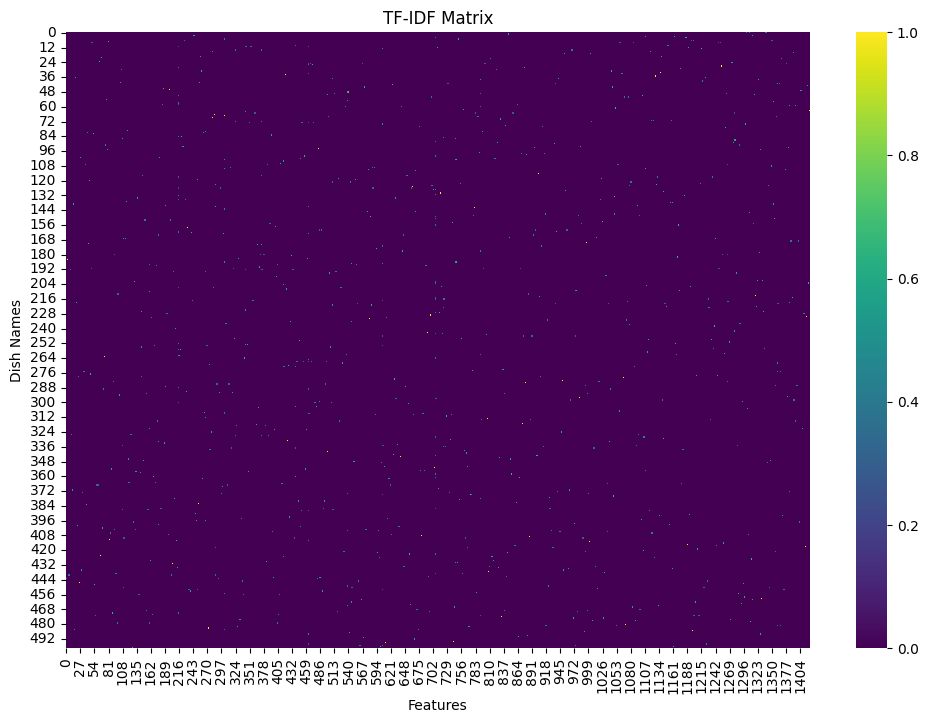

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_matrix.toarray(), cmap='viridis', cbar=True)
plt.title('TF-IDF Matrix')
plt.xlabel('Features')
plt.ylabel('Dish Names')
plt.show()

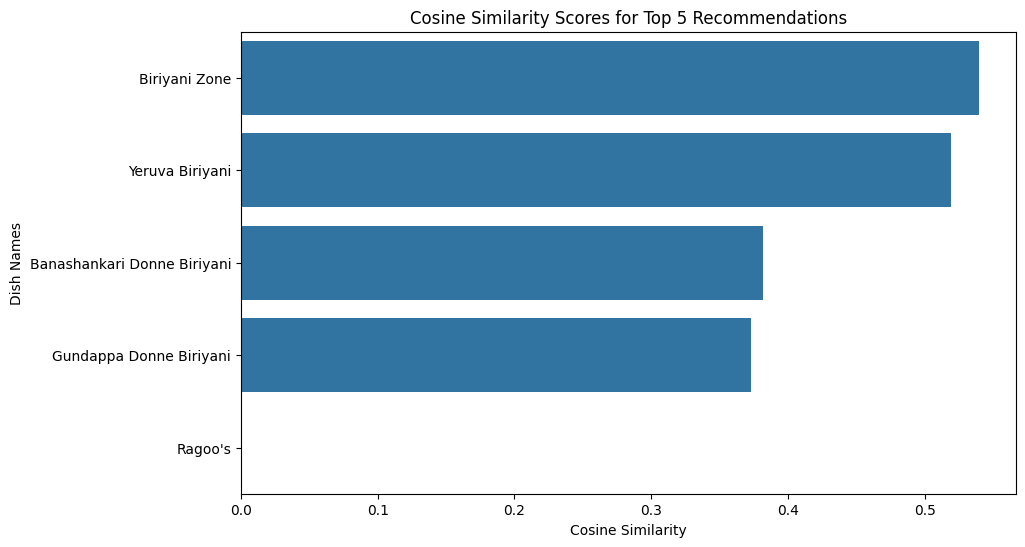

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cosine_similarities[top_indices], y=[dish_names[i] for i in top_indices])
plt.title('Cosine Similarity Scores for Top 5 Recommendations')
plt.xlabel('Cosine Similarity')
plt.ylabel('Dish Names')
plt.show()

In [17]:
print("Recommended Dishes:\n")
for dish in recommended_dishes:
    print(dish)

Recommended Dishes:

Biriyani Zone
Yeruva Biriyani
Banashankari Donne Biriyani
Gundappa Donne Biriyani
Ragoo's
